In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Import csv files
CSCO = pd.read_csv(r'C:\Users\andre\Desktop\Python\MPT\CSCO.csv', parse_dates=['Date'], index_col='Date')
IBM = pd.read_csv(r'C:\Users\andre\Desktop\Python\MPT\IBM.csv', parse_dates=['Date'], index_col='Date')
INTC = pd.read_csv(r'C:\Users\andre\Desktop\Python\MPT\INTC.csv', parse_dates=['Date'], index_col='Date')
MSFT = pd.read_csv(r'C:\Users\andre\Desktop\Python\MPT\MSFT.csv', parse_dates=['Date'], index_col='Date')
DIA = pd.read_csv(r'C:\Users\andre\Desktop\Python\MPT\DIA.csv', parse_dates=['Date'], index_col='Date')

#Drop unnecesary colomns
CSCO = CSCO.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
IBM = IBM.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
INTC = INTC.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
MSFT = MSFT.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
DIA = DIA.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])

#Rename columns
CSCO.columns = ['CSCO']
IBM.columns = ['IBM']
INTC.columns = ['INTC']
MSFT.columns = ['MSFT']
DIA.columns = ['DIA']

In [39]:
#Combine into single chart
stocks = pd.concat([CSCO, IBM, INTC, MSFT], axis=1).dropna()
print(stocks)


             CSCO     IBM   INTC    MSFT
Date                                    
2014-01-02  22.00  185.53  25.79   37.16
2014-01-03  21.98  186.64  25.78   36.91
2014-01-06  22.01  186.00  25.46   36.13
2014-01-07  22.31  189.71  25.59   36.41
2014-01-08  22.29  187.97  25.43   35.76
...           ...     ...    ...     ...
2018-12-24  40.28  107.57  43.59   94.13
2018-12-26  42.47  111.39  46.19  100.56
2018-12-27  42.91  113.78  46.36  101.18
2018-12-28  42.77  113.03  46.75  100.39
2018-12-31  43.33  113.67  46.93  101.57

[1258 rows x 4 columns]


In [40]:
#Find daily returns
daily_returns = np.log(stocks)
daily_returns = daily_returns.diff()
print(daily_returns)

                CSCO       IBM      INTC      MSFT
Date                                              
2014-01-02       NaN       NaN       NaN       NaN
2014-01-03 -0.000910  0.005965 -0.000388 -0.006750
2014-01-06  0.001364 -0.003435 -0.012490 -0.021359
2014-01-07  0.013538  0.019750  0.005093  0.007720
2014-01-08 -0.000897 -0.009214 -0.006272 -0.018014
...              ...       ...       ...       ...
2018-12-24 -0.038237 -0.030848 -0.028273 -0.042635
2018-12-26  0.052943  0.034896  0.057936  0.066078
2018-12-27  0.010307  0.021229  0.003674  0.006147
2018-12-28 -0.003268 -0.006613  0.008377 -0.007839
2018-12-31  0.013008  0.005646  0.003843  0.011686

[1258 rows x 4 columns]


In [41]:
#Calculate average annual returns
annual = daily_returns.sum(axis = 0)
print(annual/5)

#Create array with the average annual returns
annual_average_returns = np.array([0.135561, -0.097983, 0.119734, 0.201103])
print(annual_average_returns)

CSCO    0.135561
IBM    -0.097983
INTC    0.119734
MSFT    0.201103
dtype: float64
[ 0.135561 -0.097983  0.119734  0.201103]


In [42]:
# daily covariance of stocks (for each monthly period)
covariances = daily_returns.cov()
print(covariances)
#convert to annual covariances
covariances = covariances*250
print(covariances)


          CSCO       IBM      INTC      MSFT
CSCO  0.000177  0.000080  0.000113  0.000112
IBM   0.000080  0.000160  0.000083  0.000086
INTC  0.000113  0.000083  0.000242  0.000131
MSFT  0.000112  0.000086  0.000131  0.000212
          CSCO       IBM      INTC      MSFT
CSCO  0.044311  0.020104  0.028240  0.027941
IBM   0.020104  0.040090  0.020685  0.021453
INTC  0.028240  0.020685  0.060444  0.032736
MSFT  0.027941  0.021453  0.032736  0.053066


In [43]:
# get portfolio returns, volatility, and weights
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

cov = covariances
for single_portfolio in range(500000):
    weights = np.random.random(4)
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_average_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    portfolio_returns.setdefault(single_portfolio, []).append(returns)
    portfolio_volatility.setdefault(single_portfolio, []).append(volatility)
    portfolio_weights.setdefault(single_portfolio, []).append(weights)

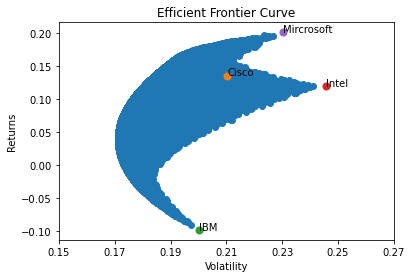

In [44]:
data = {"x":[], "y":[], "label":[]}

for label, coord in portfolio_volatility.items():
    data["x"].append(coord[0])

for label, coord in portfolio_returns.items():
    data["y"].append(coord[0])


# plot efficient frontier
plt.scatter(data["x"], data["y"])

plt.scatter(0.210344564, 0.135561, s=50)
plt.scatter(0.200050336, -0.097983, s=50)
plt.scatter(0.24566, 0.119734, s=50)
plt.scatter(0.230181392, 0.201103, s=50)

plt.annotate("Cisco", (0.210344564, 0.135561))
plt.annotate("IBM", (0.200050336, -0.09798))
plt.annotate("Intel", (0.24566, 0.119734))
plt.annotate("Mircrosoft", (0.230181392, 0.201103))

plt.xticks([0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27])
plt.title('Efficient Frontier Curve')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()